# The Exoplanet Census: Observational Bias and the Radius Gap

In [1]:
# Importing Important Libraries for Data Manipulation and Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Path to the Dataset
DATA_FILE = 'PSCompPars_2025.10.26_04.25.20.csv'

# Skipping Unnecessary Rows and Setting Columns Headers
df = pd.read_csv(DATA_FILE, skiprows=84, header=0)

In [3]:
# Simplifying the Names of Column Headers for Clarity:

new_names = {

'pl_name': 'exoplanet_name',

'pl_orbper': 'orbital_period_days',

'disc_year': 'discovery_year',

'pl_bmasse': 'exoplanet_mass_earth',

'pl_rade': 'exoplanet_rad_earth',

'hostname': 'steller_name',

'pl_eqt': 'equilibrium_temp_kelvin',

'pl_discmethod': 'discovery_method',

'st_mass': 'star_mass_solar',

'st_rad': 'star_rad_solar',

'st_teff': 'star_temp_kelvin',

'st_logg': 'star_log_gravity',

'st_age': 'star_age_gyr',

'st_dist': 'star_dis_parsec',

'st_spectype': 'spectral_type',

'st_met': 'star_metallicity',

'st_metratio': 'star_metallic_ratio',

'st_lum': 'star_luminosity',

'st_vsin': 'star_rot_vel',

'st_rotp': 'star_rot_period_days',

'st_radv': 'star_rad_vel',

'ra': 'star_ra_degrees',

'dec': 'star_dec_degrees',

'sy_dist': 'system_dis_parsec',

'sy_vmag': 'system_visual_magnitude',

'sy_kmag': 'system_infrared_magnitude'

}

df.rename(columns=new_names, inplace=True)

In [4]:
# Dropping Uncertanity/Error Columns to Focus on Physical Informations:

columns_to_drop = [

'sy_snum', 'sy_pnum', 

'disc_facility', 'pl_orbpererr1',

'pl_orbpererr2', 'pl_orbperlim',

'pl_radeerr1', 'pl_radeerr2',

'pl_radelim', 'pl_bmasseerr1',

'pl_bmasseerr2', 'pl_bmasselim',

'pl_eqterr1', 'pl_eqterr2',

'pl_eqtlim', 'st_raderr1',

'st_raderr2', 'st_radlim', 

'st_masserr1', 'st_masserr2',

'st_masslim', 'st_meterr1',
    
'st_meterr2', 'st_metlim',

'st_tefferr1', 'st_tefferr2',

'st_tefflim', 'st_lumerr1',
    
'st_lumerr2', 'st_lumlim',

'st_loggerr1', 'st_loggerr2',

'st_logglim', 'st_ageerr1',
    
'st_ageerr2', 'st_agelim',

'st_vsinerr1', 'st_vsinerr2',

'st_vsinlim', 'st_rotperr1',
    
'st_rotperr2', 'st_rotplim',

'st_radverr1', 'st_radverr2',

'st_radvlim', 'rastr', 
    
'decstr', 'sy_disterr1',
    
'sy_disterr2', 'sy_vmagerr1',

'sy_vmagerr2', 'sy_kmagerr1',

'sy_kmagerr2'

]

df.drop(columns=columns_to_drop, inplace=True)

# Introduction

The cosmos is vast and has countless secrets. For centuries, our knowledge was limited to the eight planets orbiting in our solar system. This has changed over time as science and technology advanced rapidly leading to inventions of powerful telescopes which accelerated discoveries of many exoplanets orbiting stars far from our solar system. Specially missions like Kepler and TESS have led to discoveries of many exoplanets. This success has given us a huge collection of the exoplanets data.

However, the list of confirmed planets is not a true picture of the galaxy. There is a lot of missing data which reveals that our current search methods are currently limited which makes finding certain types of planets much easier than others.

The report visualizes these limitations and biases through two key data plots. The plots will focus on two major scientific features: Planets that dominate the census due to observational limits, and the Radius Gap, which defines the complexities of planetary formation and provides insights on evolution.

# Methodology

To investigate these features, data comprising the properties of approximately 6,000 confirmed exoplanets  was extracted from NASA's official exoplanet archive in the form of a csv file. Data cleaning and preparation were performed using Python libraries like Pandas and NumPy. The collection is heavily dominated by discoveries made by missions like Kepler and TESS using the Transit Method. This method of exoplanet detection relies on constant observation of a star's brightness, any minor dip or decrease in the intensity of light sourcing from an star confirms the exoplanet's availability in that particular system. Using this data, the exoplanet's mass, radius, and orbital period are calculated, details are further analysed to get more information.

## Data Preparation and Technical Decisions

### Use of Logarithmic Scale (log|x| and log|y|):
The enormous range in the collected data required some steps of precise visualization. The significant variability in planetary properties such as: orbital period range from less than a day to hundreds of millions of days. To overcome this immense variability, logarithmic scale(log|x| and log|y|) was used to plot visuals as using the log scale helps us to fill up and analyse a large number of content which we are not able to visualize using a simple number lined graph.

### Technical Errors/Difficulties Faced and Lessons Learned:
During the intial data setup, a lot of errors were observed regarding the use of Python Environment like "Pandas not detected on (.venv) Kernel", etc. During the process of plotting the graphs, a persistent error of name not found was ocurring ("Error: 'discovery_method' not found"), it was due to the unnecessary use of an underscore("_") included while column naming, which was not present in the dataset's header. This debugging process took several hours to resolve. To ensure proper use of astronomical terminologies and understanding of different detection techniques, information were gathered from the official website of National Aeronautics and Space Administration (NASA), United States. Similarly, the skills for using the markdown cell features of jupyter notebook were self-taught through websites like DataCamp. Finally, the dataset was filtered to make sure that entries with missing values are not represented, resulting in the final count of 5,999 confirmed exoplanets.

In [5]:
#Printing the Statistical Summary:

print("Statistical Summary of the Numerical Columns:")
print(df.describe())

Statistical Summary of the Numerical Columns:
       discovery_year  orbital_period_days  exoplanet_rad_earth  \
count     6028.000000         5.720000e+03          6004.000000   
mean      2016.815362         7.481418e+04             5.809699   
std          4.871597         5.317788e+06             5.345519   
min       1992.000000         9.070629e-02             0.309800   
25%       2014.000000         4.341330e+00             1.820000   
50%       2016.000000         1.108732e+01             2.830000   
75%       2021.000000         3.976274e+01            11.951596   
max       2025.000000         4.020000e+08            77.342100   

       exoplanet_mass_earth  equilibrium_temp_kelvin  star_rad_solar  \
count           5997.000000              4506.000000     5737.000000   
mean             388.935858               916.354672        1.508969   
std             1111.770520               465.137431        3.956330   
min                0.020000                34.000000        0.

# Descriptive Statistics

The statistical summary of the raw data reveals that exoplanet properties are vastly widespread, while those of the host stars are compact. For example, the orbital period days for the exoplanets range from a minimum of $9.07 \times 10^{-2}$ days (less than 2.2 hours) to a maximum of over 400 million days, indicating enormous variability. This extreme variance in the standard deviation which is approximately $5.3 \times 10^6$, confirms the need for a logarithmic approach in our visualizations. On the other hand, the host stars mass and radius are typically close to the solar mass, clustering tightly around $0.94 M_{\odot}$. This is a key finding as it suggests that our current detection techniques are limited for finding planets that orbit predictable, Sun-like stars, resulting in bias discoveries of certain types of exoplanets.

Plotting a Histogram to compare the Orbital Periods of all Exoplanets:


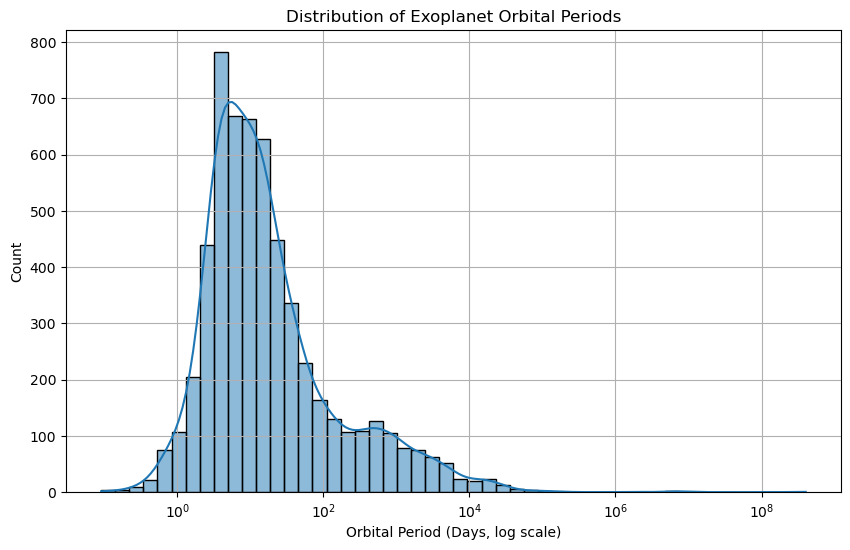

In [6]:
# Plotting a Histogram to Compare Orbital Periods of the Exoplanets

print("Plotting a Histogram to compare the Orbital Periods of all Exoplanets:")

# Creating a Figure with a Width of 10 Inches and Height of 6 Inches for Better Visibility
plt.figure(figsize=(10, 6))

# Using Seaborn to Create the Plot
# Bins=50 - Plotting 50 Bars to Interpret the Data
# Kde=True - Kernel Density Estimate to Check the Smoothness
sns.histplot(df['orbital_period_days'], bins=50, kde=True, log_scale=True)

# Setting Titles
plt.title('Distribution of Exoplanet Orbital Periods')
plt.xlabel('Orbital Period (Days, log scale)')
plt.ylabel('Count')

# Enabling the Grid
plt.grid(True)

# The Fianl Plot
plt.show()

# Distribution of Exoplanets with relation to their Orbital Periods

The histogram above displays the frequency distribution of exoplanets with regard to their orbital periods.

The analysis is performed on a logarithmic scale to properly visualize the extreme range of orbital times, from planets circling their stars in less than a day to those taking several years. The $10^0$ represents that the planets complete their rotation around the host star in a day(Earth's). The data reveals that most of the exoplanets have a orbital period of 30-60 days which concludes that most of the exoplanets are very close to their host stars. This is also because the current detection techniques favour finding planets that are relatively close to their host stars. In the far right you can see a very tiny bulge reflecting a few number of exoplanets with very large orbital periods.

In conclusion, the strange distribution of the exoplanets confirms that there is a strong observational bias in current detection techniques. With most of the planets falling in that short-orbital period planets category, it is confirmed that the census is currently limited, making the number of long-period planets extremely rare and valuable.

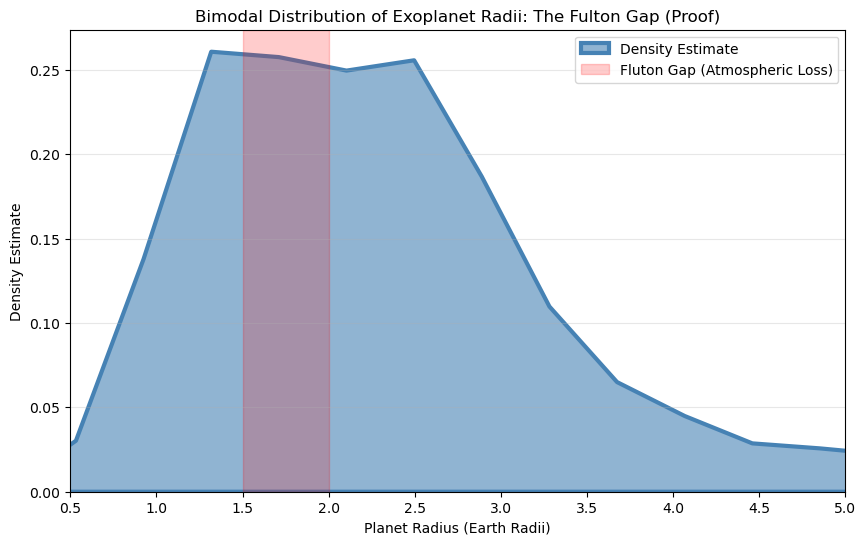

In [9]:
# Displaying the Radius Gap

plt.figure(figsize=(10, 6))

# Had to set bw_adjust to 0.2 because the default was too smooth
# This helps to see the gap properly
sns.kdeplot(data=df_filtered, x='exoplanet_rad_earth', fill=True, linewidth=3, color='steelblue', alpha=0.6, bw_adjust=0.2,
            label='Density Estimate')

# Highlighting the zone
# Using alpha=0.2 here because 'red' was way too bright and, 
# It was covering up the data lines
plt.axvspan(1.5, 2.0, color='red', alpha=0.2, label='Fluton Gap (Atmospheric Loss)')

plt.title('Bimodal Distribution of Exoplanet Radii: The Fulton Gap (Proof)')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Density Estimate')
plt.xlim(0.5, 5.0)  # Starting from 0.5 and ending at 5.0 was better for visualizing the initial surge, the fluctuations and the plunge
plt.ylim(bottom=0) # Forcing the y-axis to start at 0, just to keep it simple
plt.grid(True, axis='y', alpha=0.3)
plt.legend()
plt.show()

# References

The identification of the Radius Gap in this analysis was guided by the California-Kepler Survey (CKS) III, 2017. For the physical foundation of this phenomenon, I referred to the work of Fulton and Petigura (2017), specifically focusing on the following sections:

Section 4: The Planet Radius Gap

Section 5.3.1: Photoevaporation

Section 5.3.3: Impact Erosion

Section 5.4: Core Mass Distribution

# The Bimodal Distribution: Visualizing the Radius Gap

The KDE plot above illustrates the frequency of exoplanets relative to their physical size (Earth radii).

The data reveals two distinct peaks: one centred around 1.3 $R_{\oplus}$ (rocky Super-Earths) and another near 2.4 $R_{\oplus}$ (gaseous Sub-Neptunes). The red shaded region highlights the Fulton Gap, a significant "plunge" in the population where planets are notably missing. In my analysis, this descent is even more distinct, extending toward the 2.1–2.2 $R_{\oplus}$ range before recovering.

This "valley" serves as clear evidence of the process of atmospheric disappearance. It suggests that planets in this size range cannot maintain their atmosphere; they either lose their atmospheric gas entirely and "shrink" into the first peak or are massive enough to hold onto them and stay in the second. Simply, planets don't just gradually turn from rocks into gas giants; instead, intense heat and radiation from their stars force a sudden transformation. 

As observed in the bimodal distribution of the KDE plot, there is a distinct deficit of planets between $1.5$ and $2.0 R_{\oplus}$. This is famously known as the Radius Gap, and it is driven by two primary physical phenomena:

#### 1. Photoevaporation:
                High-energy radiation from the host star heats the planetary atmosphere, causing gases to expand and escape into space over time. This effectively "shrinks" the planet.

#### 2. Impact Erosion:
                Occurs when foreign bodies like comets, meteoroids, satellites or neighbouring/foreign planets collide, causing huge chunks of it to erode.

Plotting 5999 Exoplanets with column names to collect precise evidences:


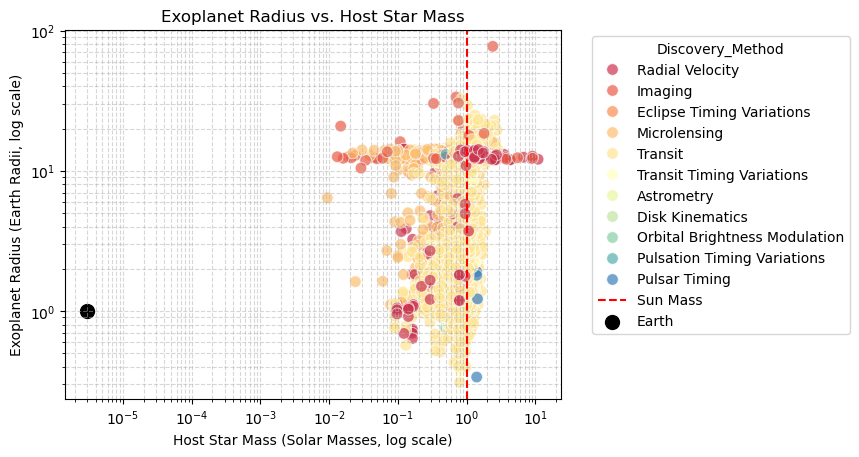

In [8]:
# Defining the confirmed column names:

X_COL = 'star_mass_solar'

Y_COL = 'exoplanet_rad_earth'

HUE_COL = 'discoverymethod' 


#1. Filtering the DataFrame using the confirmed names:

df_filtered = df.dropna (subset=[X_COL, Y_COL, HUE_COL])

print(f"Plotting {len(df_filtered)} Exoplanets with column names to collect precise evidences:")

# 2. Creating the Scatter Plot:

# Coloring by discovery method to see which techniques find which types of planets.
# (e.g., Transit usually finds planets closer to their stars).
sns.scatterplot(data=df_filtered, x=X_COL, y=Y_COL, hue=HUE_COL, palette='Spectral', alpha=0.7, s=70, legend='full')

# 3. Applying scales and labels:

plt.xscale('log')

plt.yscale('log')

plt.title('Exoplanet Radius vs. Host Star Mass')

plt.xlabel('Host Star Mass (Solar Masses, log scale)')

plt.ylabel('Exoplanet Radius (Earth Radii, log scale)')

plt.axvline(x=1.0, color='red', linestyle='--', linewidth=1.5, label='Sun Mass')

# The Sun is 333,000 times heavier than Earth
# So, using this ratio to place 'Earth' correctly on the Solar Mass scale.
plt.scatter (1/333000, 1.0, marker='o', s=100, color='black', label='Earth') # Making Earth appear a litter larger than the rest (s=100)

plt.legend(title='Discovery_Method', bbox_to_anchor=(1.05, 1), loc=2)

plt.grid(True, which="both", ls="--", alpha=0.5)

plt.show()

# Discovery Method Distribution

The graph above compares the exoplanet radius and the Stellar mass of its system. Different colours of dots in the graph represent the discovery method of these exoplanets.

The measurement is taken in logarithmic scale because of the significant variation in planetary radii and Stellar masses. The y-axis represents the exoplanet radii in the multiples of Earth's radius. For example the data at $10^1$ means that the planets radius is 10 times than that of Earth. The x-axis is identical to the y-axis with the data representing Stellar mass in respect to that of the Sun.

The resulting plot illustrates the properties of 5,999 confirmed exoplanets. While the data includes various techniques like Radial Velocity, Imaging, Microlensing, Pulsar Timing, etc, the majority of the dataset is dominated by the Transit method (represented by the orange-yellow marks), specifically from Kepler and Tess missions. Information regarding this detection technique and its biases was sourced from official NASA Science Documentation.

As observed, the points (representing exoplanets) are widespread in the right side of the graph. It suggests that most of the exoplanets host star have around the same mass as the Sun in our solar system does as most of them fall between the $10^{-1}$ to $10^0$. Whereas, there is a widespread of distribution of data along the y-axis proving the variation in exoplanets radii as we discussed earlier.

# Conclusion

In conclusion, the current exoplanet census is defined by two factors: limitation of our detection methodology and the physics of planets formation itself.

The analysis of orbital period distributions clearly showcases our observational limitations, with Transit method being the leading method of discovery. This creates a natural bias, making the discovery of short-period, gassy planets(known as Hot Jupiters) much easier. This bias shows humanity still hasn't mastered the art of finding exoplanets, especially planets those are habitable. Furthermore, the comparison between exoplanet radius and Stellar mass highlighted a Radius Gap among the discovered planets. The gap is the result of a evolutionary process like photoevaporation which changes the planet's geography over time. 

Ultimately, by understanding the observational bias and the physical constraints implied by the featured data, we must look forward to directing future missions toward correcting these biases.